In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [41]:
def get_unique_values_with_counts(dataframe, column_name):
    """
    This function returns a dictionary with unique values in a specified column of a dataframe
    and their corresponding counts.
    
    Parameters:
    dataframe (pd.DataFrame): The dataframe containing the data.
    column_name (str): The name of the column to extract unique values and counts from.
    
    Returns:
    dict: A dictionary where keys are unique values and values are their counts.
    """
    value_counts = dataframe[column_name].value_counts()
    return value_counts.to_dict()

# Function to find keywords in specified columns
def find_keywords(row, columns, keywords):
    found_keywords = []
    for column in columns:
        for keyword in keywords:
            if pd.notna(row[column]) and keyword in row[column]:
                found_keywords.append(keyword)
    return found_keywords

In [42]:
df = pd.read_csv('ibm_data.csv')

In [43]:
df = pd.read_csv("https://datasocibmproject.s3.ap-southeast-2.amazonaws.com/structured_data/capital_project_schedules_and_budgets_1.csv")
df = df.drop(df.columns[0], axis=1)

df = df[df['project_status_name'] == 'PNS']
# df = df[df['project_status_name'] == 'In-Progress']
# df = df[df['project_status_name'] == 'Complete']
df.to_csv('ibm_PNS.csv', index=False)

df.shape

(3046, 15)

In [44]:
# df.columns.tolist()

In [45]:
get_unique_values_with_counts(df, 'failure')

{False: 2637, True: 409}

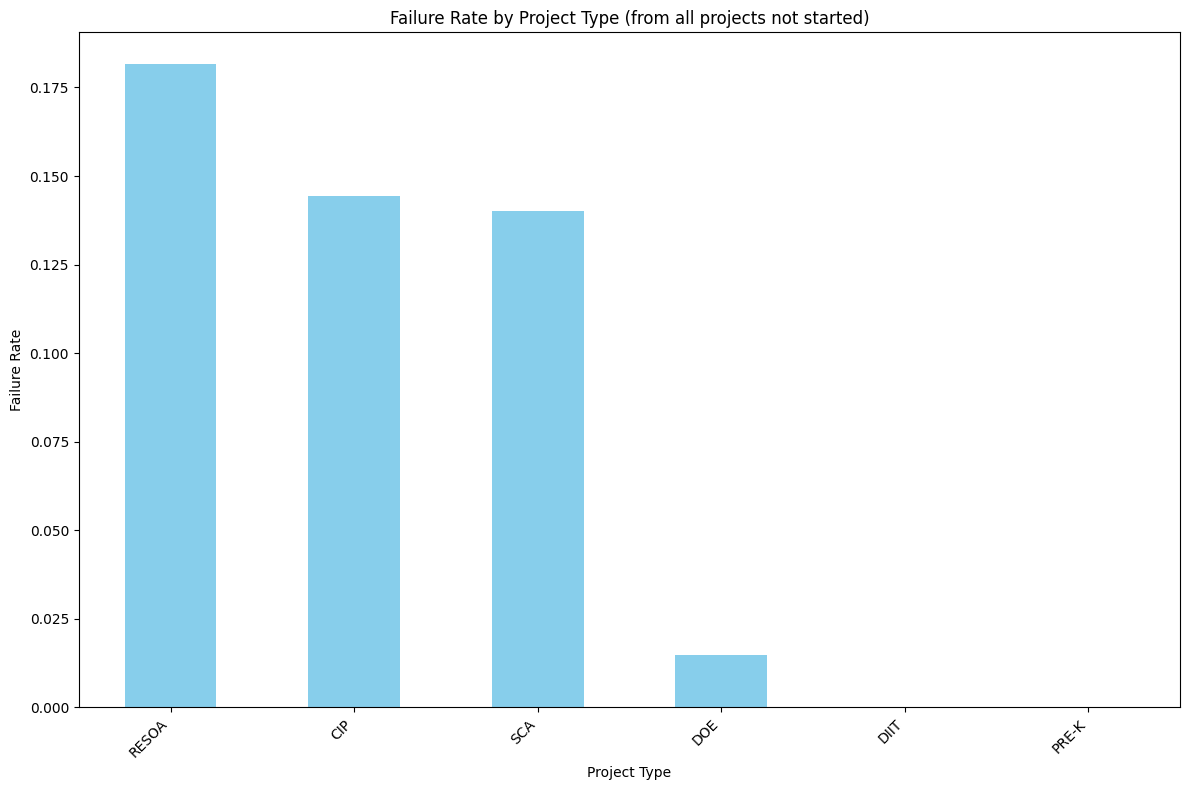

In [46]:
# List of keywords to keep
project_types = [
    "SCA", "CIP", "DIIT", "DOE", "DOES", "DOER",
    "RESOA", "IEH", "PRE-K", "DCAS", "FY", "FAST TRACK PROJECTS"
]

df_PNS = df.map(lambda x: x.replace('PREK', 'PRE-K') if isinstance(x, str) else x)

# Columns to check for project types
columns_to_check = ['project_type', 'project_phase_planned_end_date']

# Apply the function to each row
df['project_type_split'] = df.apply(lambda row: find_keywords(row, columns_to_check, project_types), axis=1)

# Explode the list into separate rows
df_exploded = df.explode('project_type_split')

# Filter out rows where 'project_type_split' is NaN
df_exploded = df_exploded[df_exploded['project_type_split'].notna()]

# Calculate the failure rate for each project type
failure_rate = df_exploded.groupby('project_type_split')['failure'].mean()

# Sort the failure rate
failure_rate = failure_rate.sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(12, 8))
failure_rate.plot(kind='bar', color='skyblue')
plt.title('Failure Rate by Project Type (from all projects not started)')
plt.xlabel('Project Type')
plt.ylabel('Failure Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [47]:
# Checking for duplicate rows
duplicate_rows = df_exploded.duplicated().sum()

# Removing duplicate rows if any
df_cleaned = df_exploded.drop_duplicates()

duplicate_rows, df_cleaned.shape

(0, (8031, 16))

In [48]:
df_exploded[df_exploded['project_type_split'] == 'RESOA']

,project_geographic_district,project_building_identifier,project_school_name,project_type,project_description,project_phase_name,project_status_name,project_phase_actual_start_date,project_phase_planned_end_date,project_phase_actual_end_date,project_budget_amount,final_estimate_of_actual_costs_through_end_of_phase_amount,total_phase_actual_spending_amount,dsf_number_s,failure,project_type_split
4,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Construction,PNS,PNS,PNS,PNS,280280,280280.0,951.0,DSF: 0000823560,False,RESOA
5,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,"CM, F&E",PNS,PNS,PNS,PNS,69238,52551.0,2423.0,DSF: 0000823560,False,RESOA
12,10,X279,P.S. 279 - BRONX,DOE- RESOA,FY15 RESO A ROOM CONVERSIONS / PART,Construction,PNS,PNS,PNS,PNS,435000,435000.0,0.0,DSF: 0000800475,False,RESOA
23,10,X360,P.S. 360 - BRONX,SCA CIP RESOA,FY18 RESO A PLAYGROUNDS,Scope,PNS,PNS,PNS,PNS,0,0.0,0.0,DSF: 0000866428,True,RESOA
24,10,X360,P.S. 360 - BRONX,SCA CIP RESOA,FY18 RESO A PLAYGROUNDS,Design,PNS,PNS,PNS,PNS,7500,7500.0,0.0,DSF: 0000866428,False,RESOA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8160,32,K480,THE BROOKLYN SCHOOL FOR SOCIAL,SCA CIP RESOA,FY18 RESO A SCIENCE LAB UPGRADES,Design,PNS,PNS,PNS,PNS,15000,15000.0,0.0,DSF: 0000867373,False,RESOA
8161,32,K480,THE BROOKLYN SCHOOL FOR SOCIAL,SCA CIP RESOA,FY18 RESO A SCIENCE LAB UPGRADES,Construction,PNS,PNS,PNS,PNS,220000,220000.0,0.0,DSF: 0000867373,False,RESOA
8162,32,K480,THE BROOKLYN SCHOOL FOR SOCIAL,SCA CIP RESOA,FY18 RESO A SCIENCE LAB UPGRADES,"CM, F&E",PNS,PNS,PNS,PNS,15000,15000.0,0.0,DSF: 0000867373,False,RESOA
8165,32,K480,ACAD. FOR ENVIRON. LDRSHP - K,SCA CIP RESOA,FY14 RESO A SCIENCE LAB,Construction,PNS,PNS,PNS,PNS,1100000,1100000.0,1817.0,DSF: 0000777404,False,RESOA
